In [1]:
import pandas as pd
import os 
import random
import subprocess

import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats
import numpy as np
import sys, argparse
from scipy.stats import norm
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [2]:
maf = pd.read_csv('../key_files/maf_all_samples.csv')

In [3]:
maf.columns = ['MAF']

In [4]:
wd = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/lfmm_fullresults_all_k/'

In [5]:
pwd - P

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/wza_last_gen'

In [6]:
biovar = 'bio1'

In [17]:
pvalues_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/lfmm_fullresults_all_k/lfmm_{biovar}_k25_results.csv'

In [279]:
lfmm = pd.read_csv(pvalues_file)

In [20]:
lfmm[lfmm['p_value'].isna()]

,snp_id,p_value,significant,block


In [22]:
lfmm.dropna()

,snp_id,p_value,significant,block
0,1_346,7.657514e-01,False,1_0
1,1_353,2.399266e-02,False,1_0
2,1_363,6.970041e-01,False,1_0
3,1_395,7.417576e-01,False,1_0
4,1_396,7.417576e-01,False,1_0
...,...,...,...,...
1054569,5_26975078,3.863299e-02,False,5_3110
1054570,5_26975121,2.719072e-01,False,5_3110
1054571,5_26975148,2.719072e-01,False,5_3110
1054572,5_26975272,8.939716e-01,False,5_3110


In [663]:
lfmm[lfmm['block'] == '5_2922']

,snp_id,p_value,significant,block
1031113,5_24100648,0.008709,False,5_2922
1031114,5_24101346,0.685729,False,5_2922
1031115,5_24101375,0.984976,False,5_2922
1031116,5_24101376,0.984976,False,5_2922
1031117,5_24101380,0.685729,False,5_2922
...,...,...,...,...
1032712,5_24286249,0.083222,False,5_2922
1032713,5_24286309,0.156366,False,5_2922
1032714,5_24286329,0.504089,False,5_2922
1032715,5_24286340,0.157291,False,5_2922


In [287]:
lfmm.groupby('block').size().sort_values().tail(21)

block
2_973     1849
3_551     1869
2_1498    1888
2_1264    1911
3_518     1946
5_3006    1968
5_918     1984
2_1434    2021
1_2123    2080
5_331     2099
5_923     2130
5_542     2163
1_5160    2218
5_891     2261
4_234     2282
5_775     2366
5_274     2460
5_602     2488
1_2134    2584
5_724     2972
2_576     3028
dtype: int64

In [291]:
lfmm[lfmm['block'].isin(nan_blocks_0_min)].groupby('block').size().sort_values()

block
2_973     1849
3_551     1869
2_1498    1888
2_1264    1911
3_518     1946
5_3006    1968
5_918     1984
2_1434    2021
1_2123    2080
5_331     2099
5_923     2130
5_542     2163
1_5160    2218
5_891     2261
4_234     2282
5_775     2366
5_274     2460
5_602     2488
1_2134    2584
5_724     2972
2_576     3028
dtype: int64

In [77]:
lfmm[lfmm['block'].isin(blocks_na)].groupby('block').size()

block
1_2123    2080
1_2134    2584
1_5160    2218
2_1264    1911
2_1434    2021
2_1498    1888
2_576     3028
2_973     1849
3_518     1946
3_551     1869
4_234     2282
5_274     2460
5_3006    1968
5_331     2099
5_542     2163
5_602     2488
5_724     2972
5_775     2366
5_891     2261
5_918     1984
5_923     2130
dtype: int64

In [23]:
lfmm = pd.concat([lfmm, maf['MAF']],axis=1)

In [25]:
lfmm.to_csv('lfmm_results_all_samples_k25_wmaf.csv',index=None)

In [25]:
lfmm.dropna()

,snp_id,p_value,significant,block,MAF
0,1_346,7.657514e-01,False,1_0,0.281796
1,1_353,2.399266e-02,False,1_0,0.074906
2,1_363,6.970041e-01,False,1_0,0.104640
3,1_395,7.417576e-01,False,1_0,0.065442
4,1_396,7.417576e-01,False,1_0,0.065442
...,...,...,...,...,...
1054569,5_26975078,3.863299e-02,False,5_3110,0.161471
1054570,5_26975121,2.719072e-01,False,5_3110,0.072238
1054571,5_26975148,2.719072e-01,False,5_3110,0.072238
1054572,5_26975272,8.939716e-01,False,5_3110,0.474359


In [49]:
blocks_na

array(['1_2123', '1_2134', '1_5160', '2_1264', '2_1434', '2_1498',
       '2_576', '2_973', '3_518', '3_551', '4_234', '5_274', '5_3006',
       '5_331', '5_542', '5_602', '5_724', '5_775', '5_891', '5_918',
       '5_923'], dtype=object)

In [46]:
filter = lfmm[lfmm['MAF'] >= 0.05]

In [48]:
filter[filter['block'].isin(blocks_na)]

,snp_id,p_value,significant,block,MAF
118792,1_13286216,0.629293,False,1_2123,0.227469
118793,1_13286357,0.218588,False,1_2123,0.124270
118794,1_13286422,0.259168,False,1_2123,0.128982
118795,1_13287144,0.227265,False,1_2123,0.126404
118796,1_13287145,0.218588,False,1_2123,0.124270
...,...,...,...,...,...
1040849,5_25376120,0.022734,False,5_3006,0.084575
1040850,5_25376918,0.042089,False,5_3006,0.067002
1040851,5_25376968,0.013435,False,5_3006,0.104261
1040852,5_25377910,0.022734,False,5_3006,0.084575


In [59]:
path = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/wza'

In [209]:
## create a dir 

#        --sample_snps 1729 \
#        --resample 50 \
# create sbatch files to submit on cedar server
shfiles = []

seed = random.randint(1,100000000)
file = 'wza.sh'
cmd = f'python general_WZA_script_mod.py \
        --correlations lfmm_results_all_samples_k25_wmaf.csv \
        --summary_stat p_value \
        --sample_snps 0 \
        --window block \
        --output wza_results_lfmm_bio1.csv \
        --sep ","'
text = f'''#!/bin/bash
#SBATCH --job-name=wza
#SBATCH --time=1:00:00  # Time limit set to 4 days
#SBATCH --ntasks=1
#SBATCH --mem-per-cpu=30gb
#SBATCH --output=wza_%j.out
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

module load python/3.11_conda
conda activate /home/tbellagio/miniforge3/envs/pipeline_snakemake
export LD_LIBRARY_PATH="/home/tbellagio/miniforge3/envs/run_baypass/lib:$LD_LIBRARY_PATH"
cd /carnegie/nobackup/scratch/tbellagio/gea_grene-net/wza
{cmd}


'''
with open(file, 'w') as o:
    o.write("%s" % text)
shfiles.append(file)

In [210]:
## now run the shfiles
for shfile in shfiles:
    # Submit each sbatch script to the SLURM scheduler
    subprocess.run(["sbatch", shfile], check=True)

Submitted batch job 30469


In [57]:
biovar = 'bio1'

In [280]:
wza_df = pd.read_csv('before_filtering_wza_df.csv').drop('Unnamed: 0', axis=1)

In [281]:
wza_t.shape

(16629, 5)

In [282]:
# remove null Z values - they won't help us
wza_t =  wza_df[ ~wza_df.Z.isnull() ].reset_index(drop=True)
wza_s = wza_t.sort_values('SNPs').reset_index(drop=True)

In [283]:
wza_s

,gene,SNPs,hits,Z,top_candidate_p
0,2_1463,1,0,-0.890654,1.000000e+00
1,2_837,1,0,-0.244225,1.000000e+00
2,2_847,1,0,-0.923626,1.000000e+00
3,3_2124,1,0,-1.483967,1.000000e+00
4,5_1497,1,0,0.198246,1.000000e+00
...,...,...,...,...,...
16624,5_775,2354,7,4.543643,9.999826e-01
16625,1_2134,2401,0,0.941285,1.000000e+00
16626,5_602,2427,216,21.579232,1.936139e-127
16627,2_576,2694,0,-25.041613,1.000000e+00


In [284]:
roller=50
minEntries=5
poly_deg = 12

In [285]:
rolled_Z_vars = wza_s.Z.rolling(window=roller, min_periods=minEntries).var()

In [286]:
masking_array = ~rolled_Z_vars.isnull()

In [287]:
rolled_Z_sd = np.sqrt(rolled_Z_vars)[masking_array]

In [288]:
rolled_Z_means = wza_s.Z.rolling(window=roller, min_periods=minEntries).mean()[masking_array]
rolled_mean_SNP_number = wza_s.SNPs.rolling(window=roller, min_periods=minEntries).mean()[masking_array]

In [289]:
# Generating weights for polynomial function with degree=2 - standard deviation
sd_weights = np.polyfit(rolled_mean_SNP_number, rolled_Z_sd, deg=poly_deg)

In [290]:
sd_polynomial_model = np.poly1d(sd_weights)

In [291]:
# Generating weights for polynomial function with degree=2 - mean
mean_weights = np.polyfit(rolled_mean_SNP_number, rolled_Z_means, deg=poly_deg)
mean_polynomial_model = np.poly1d(mean_weights)

sd_predictions = sd_polynomial_model(wza_df["SNPs"])
#min_nonnegative_value = sd_predictions[sd_predictions >= 0].min()
#sd_predictions = np.clip(sd_predictions, a_min=min_nonnegative_value, a_max=None)
mean_predictions = mean_polynomial_model(wza_df["SNPs"])

In [292]:
sd_predictions

array([6.17798176, 1.31996664, 2.55564357, ..., 2.81370745, 1.5464756 ,
       2.44558614])

In [293]:
mean_predictions

array([-0.10255101, -0.15776786, -0.35160366, ..., -0.38636688,
       -0.19547174, -0.33594347])

In [294]:
wza_p_values = [1 - norm.cdf(wza_df["Z"][i], loc=mean_predictions[i], scale=sd_predictions[i]) for i in range(wza_df.shape[0])]

In [295]:
wza_df['Z_pVal'] = wza_p_values

In [296]:
wza_df

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal
0,1_0,206,0,-3.013817,1.000000,0.681263
1,1_1,3,0,1.126882,1.000000,0.165216
2,1_10,22,0,0.977626,1.000000,0.301492
3,1_100,51,0,-2.211088,1.000000,0.676570
4,1_1000,9,2,2.795625,0.003436,0.042783
...,...,...,...,...,...,...
16624,5_995,36,0,-3.047358,1.000000,0.791189
16625,5_996,3,0,1.240513,1.000000,0.144725
16626,5_997,27,0,0.182008,1.000000,0.419958
16627,5_998,6,0,-2.777148,1.000000,0.952480


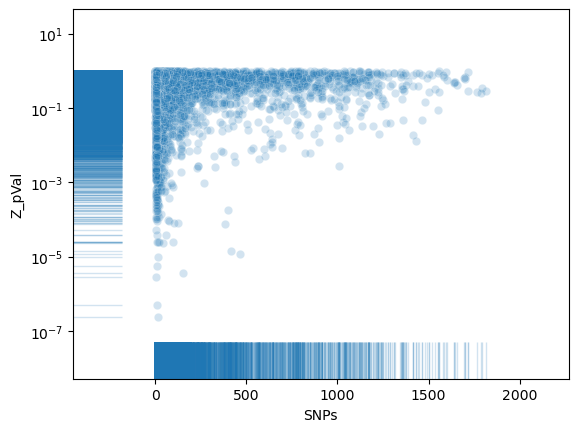

In [297]:
sns.scatterplot(data=wza_df, x='SNPs', y='Z_pVal', alpha = 0.2).set_yscale("log")
sns.rugplot(data=wza_df, x="SNPs", y="Z_pVal", height=.1, alpha=0.2).set_yscale("log")

In [298]:
wza_p_values = [1 - norm.cdf(wza_df["Z"][i]) for i in range(wza_df.shape[0])]

In [299]:
wza_df['Z_pVal_noweight'] = wza_p_values

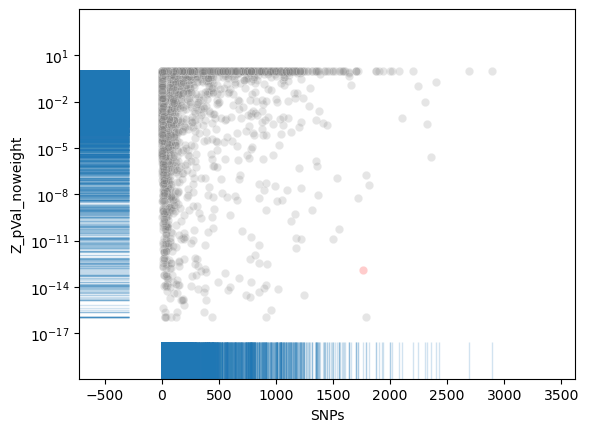

In [300]:
# Create a new column 'highlight' to identify rows where the gene is one of the specified ones
highlight_genes = [ '2_970']
wza_df['highlight'] = np.where(wza_df['gene'].isin(highlight_genes), 'red', 'grey')


sns.scatterplot(data=wza_df[wza_df['highlight'] == 'grey'], x='SNPs', y='Z_pVal_noweight', alpha = 0.2, color='grey',).set_yscale("log")
sns.scatterplot(data=wza_df[wza_df['highlight'] == 'red'], x='SNPs', y='Z_pVal_noweight', alpha = 0.2, color='red',).set_yscale("log")

sns.rugplot(data=wza_df, x="SNPs", y="Z_pVal_noweight", height=.1, alpha=0.2).set_yscale("log")

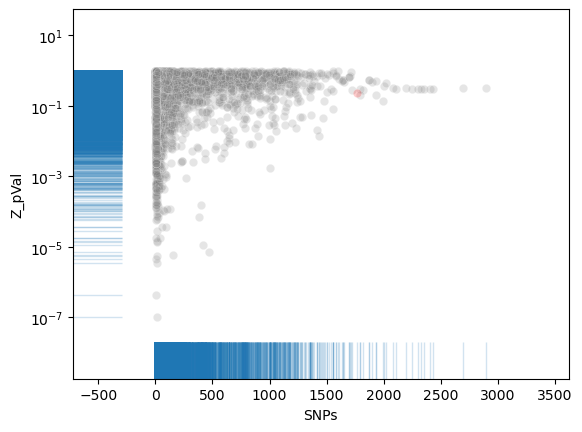

In [203]:
# Create a new column 'highlight' to identify rows where the gene is one of the specified ones
highlight_genes = [ '2_970']
wza_df['highlight'] = np.where(wza_df['gene'].isin(highlight_genes), 'red', 'grey')


sns.scatterplot(data=wza_df[wza_df['highlight'] == 'grey'], x='SNPs', y='Z_pVal', alpha = 0.2, color='grey',).set_yscale("log")
sns.scatterplot(data=wza_df[wza_df['highlight'] == 'red'], x='SNPs', y='Z_pVal', alpha = 0.2, color='red',).set_yscale("log")

sns.rugplot(data=wza_df, x="SNPs", y="Z_pVal", height=.1, alpha=0.2).set_yscale("log")

In [232]:
wza_df

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal,Z_pVal_noweight
0,1_0,206,0,-3.013817,1.000000,0.671489,0.998710
1,1_1,3,0,1.126882,1.000000,0.170174,0.129896
2,1_10,22,0,0.977626,1.000000,0.299772,0.164130
3,1_100,51,0,-2.211088,1.000000,0.683082,0.986485
4,1_1000,9,2,2.795625,0.003436,0.040999,0.002590
...,...,...,...,...,...,...,...
16624,5_995,36,0,-3.047358,1.000000,0.802722,0.998846
16625,5_996,3,0,1.240513,1.000000,0.149970,0.107393
16626,5_997,27,0,0.182008,1.000000,0.423436,0.427788
16627,5_998,6,0,-2.777148,1.000000,0.951041,0.997258


<Axes: xlabel='Z_pVal', ylabel='Z_pVal_noweight'>

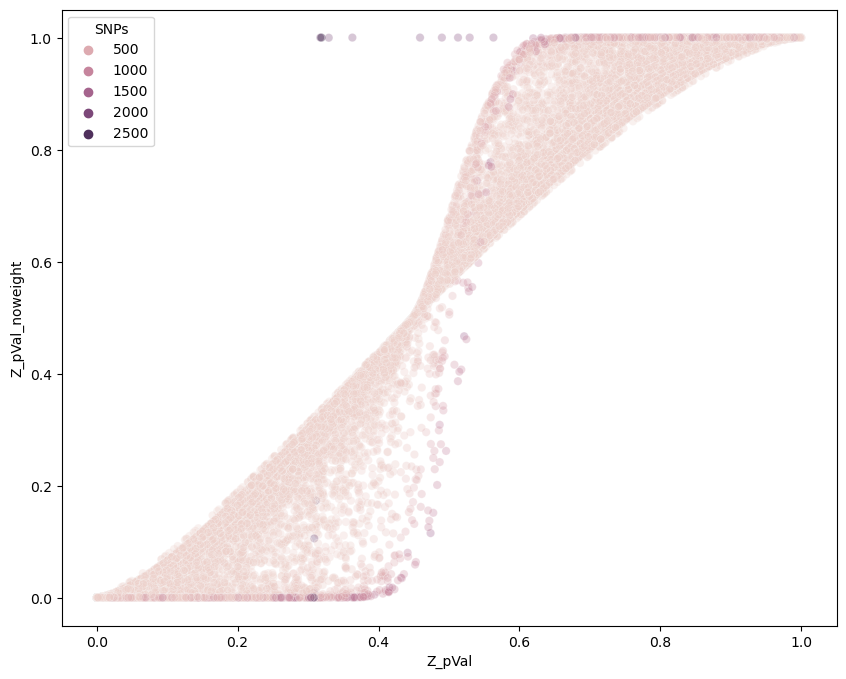

In [238]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = wza_df, x = 'Z_pVal', y = 'Z_pVal_noweight', hue = 'SNPs', alpha = 0.3)

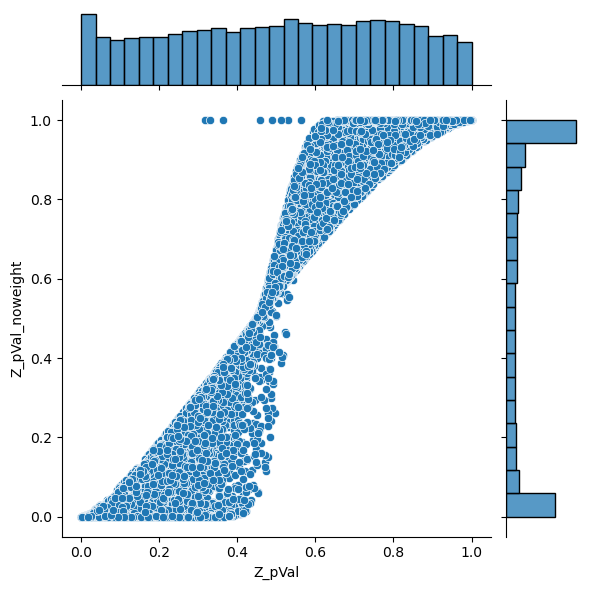

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.JointGrid(data=wza_df, x = 'Z_pVal', y = 'Z_pVal_noweight')
g.plot(sns.scatterplot, sns.histplot)


In [264]:
large_w = wza_df[wza_df['SNPs'] > 50]

<Axes: xlabel='Z_pVal', ylabel='Z_pVal_noweight'>

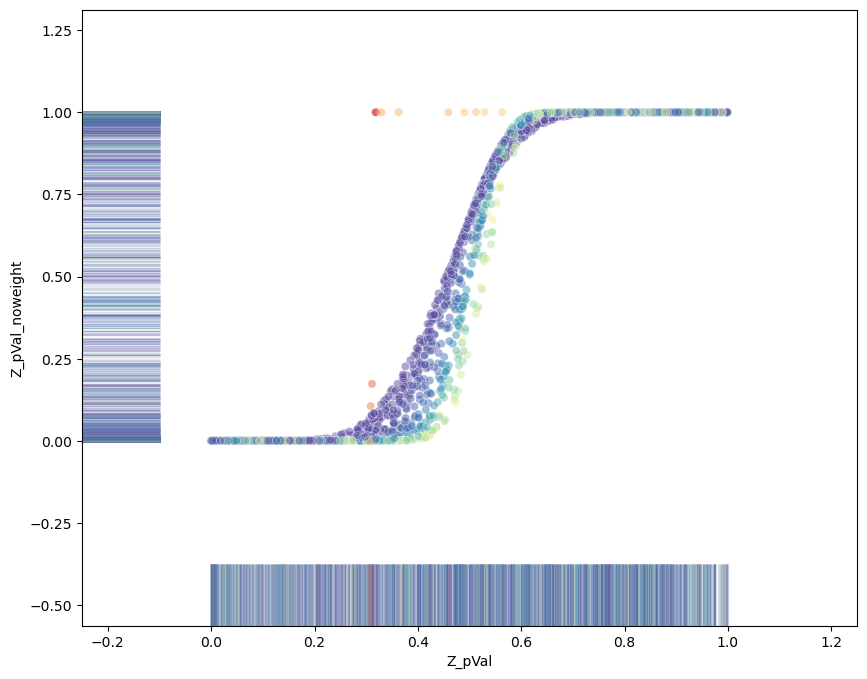

In [269]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = large_w, x = 'Z_pVal', y = 'Z_pVal_noweight', hue = 'SNPs', alpha = 0.5, palette='Spectral_r', legend=False)#.set_yscale("log").set_xscale("log")
sns.rugplot(data=large_w, x="Z_pVal", y="Z_pVal_noweight", height=.1, alpha=0.2,hue = 'SNPs',palette='Spectral_r', legend=False)#.set_yscale("log").set_xscale("log")

In [273]:
large_w = wza_df[wza_df['SNPs'] > 500]

<Axes: xlabel='Z_pVal', ylabel='Z_pVal_noweight'>

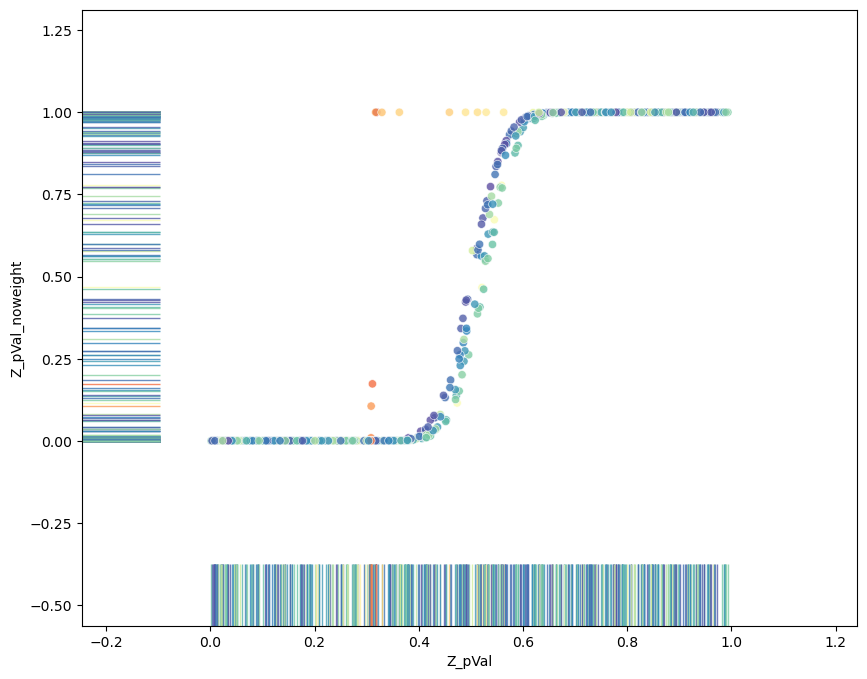

In [301]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = large_w, x = 'Z_pVal', y = 'Z_pVal_noweight', hue = 'SNPs', alpha = 0.8, palette='Spectral_r', legend=False)#.set_yscale("log").set_xscale("log")
sns.rugplot(data=large_w, x="Z_pVal", y="Z_pVal_noweight", height=.1, alpha=0.8,hue = 'SNPs',palette='Spectral_r', legend=False)#.set_yscale("log").set_xscale("log")

In [304]:
wza_df['scale'] = sd_predictions

In [305]:
wza_df['mean'] = mean_predictions

<Axes: xlabel='SNPs', ylabel='mean'>

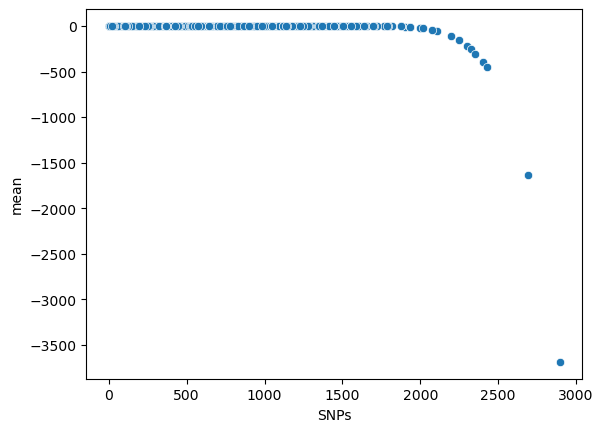

In [196]:
sns.scatterplot(data = wza_df, x = 'SNPs', y = 'mean')

<Axes: xlabel='mean', ylabel='scale'>

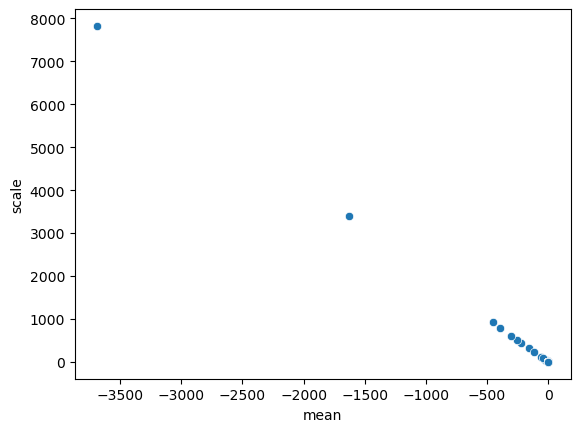

In [197]:
sns.scatterplot(data = wza_df, x = 'mean', y = 'scale')

In [303]:
wza_df

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal,Z_pVal_noweight,highlight
0,1_0,206,0,-3.013817,1.000000,0.681263,0.998710,grey
1,1_1,3,0,1.126882,1.000000,0.165216,0.129896,grey
2,1_10,22,0,0.977626,1.000000,0.301492,0.164130,grey
3,1_100,51,0,-2.211088,1.000000,0.676570,0.986485,grey
4,1_1000,9,2,2.795625,0.003436,0.042783,0.002590,grey
...,...,...,...,...,...,...,...,...
16624,5_995,36,0,-3.047358,1.000000,0.791189,0.998846,grey
16625,5_996,3,0,1.240513,1.000000,0.144725,0.107393,grey
16626,5_997,27,0,0.182008,1.000000,0.419958,0.427788,grey
16627,5_998,6,0,-2.777148,1.000000,0.952480,0.997258,grey


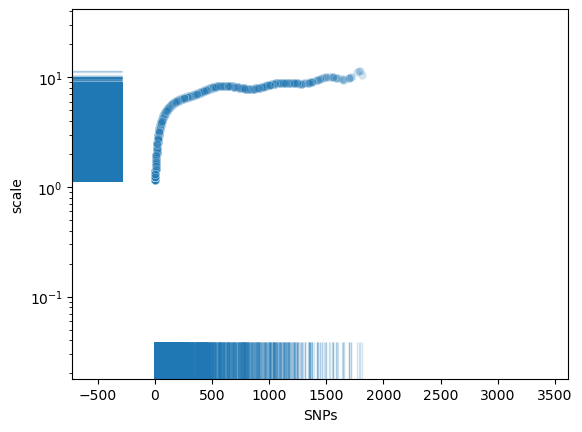

In [306]:
sns.scatterplot(data = wza_df, x = 'SNPs', y = 'scale', alpha=0.2).set_yscale("log")
sns.rugplot(data=wza_df, x="SNPs", y="scale", height=.1, alpha=0.2).set_yscale("log")


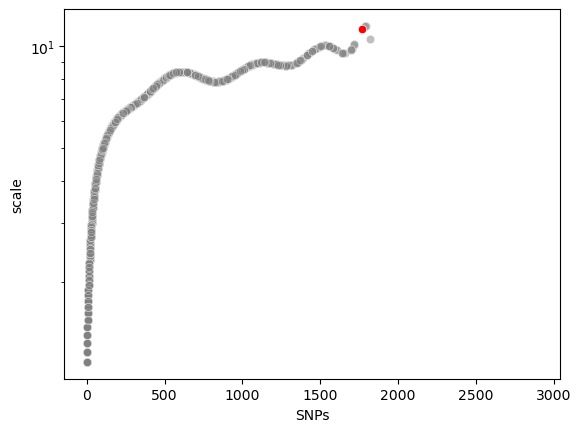

In [307]:
# Create a new column 'highlight' to identify rows where the gene is one of the specified ones
highlight_genes = [ '2_970']
wza_df['highlight'] = np.where(wza_df['gene'].isin(highlight_genes), 'red', 'grey')

# Plot the non-highlighted (grey) points first
sns.scatterplot(
    data=wza_df[wza_df['highlight'] == 'grey'], 
    x='SNPs', 
    y='scale', 
    color='grey',  # Color for non-highlighted points
    alpha=0.5  # Transparency
).set_yscale("log")

# Now plot the highlighted (red) points on top
sns.scatterplot(
    data=wza_df[wza_df['highlight'] == 'red'], 
    x='SNPs', 
    y='scale', 
    color='red',  # Color for highlighted points
    alpha=1,  # Full opacity for better visibility
    zorder=3  # Ensure these points are drawn on top
).set_yscale("log")

In [25]:
wza_df[wza_df['scale']>=0]['SNPs'].max()

1874

In [26]:
.set_yscale("log")

<Axes: xlabel='top_candidate_p', ylabel='Z_pVal'>

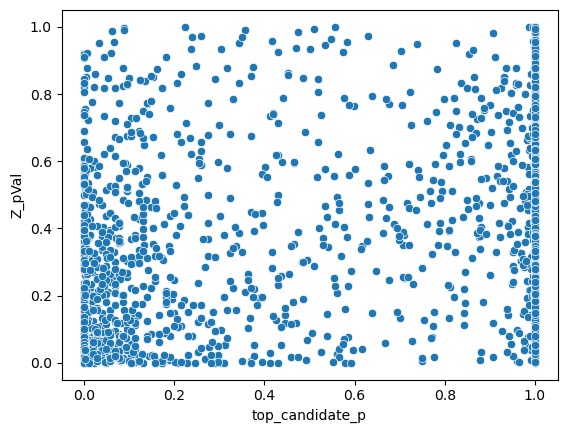

In [29]:
sns.scatterplot(data = wza_df, x = 'top_candidate_p', y = 'Z_pVal')

<Axes: xlabel='Z_pVal', ylabel='Count'>

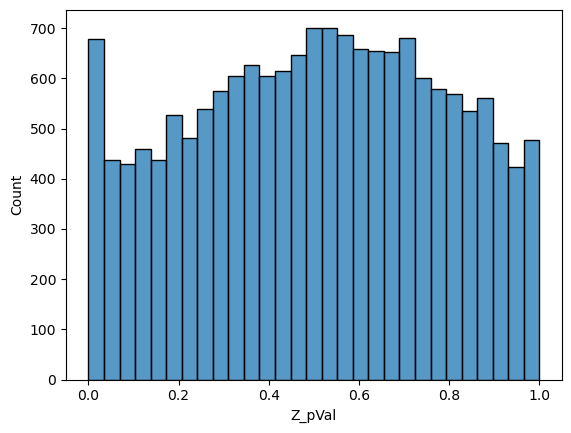

In [30]:
sns.histplot(wza_df['Z_pVal'])

<Axes: xlabel='top_candidate_p', ylabel='Count'>

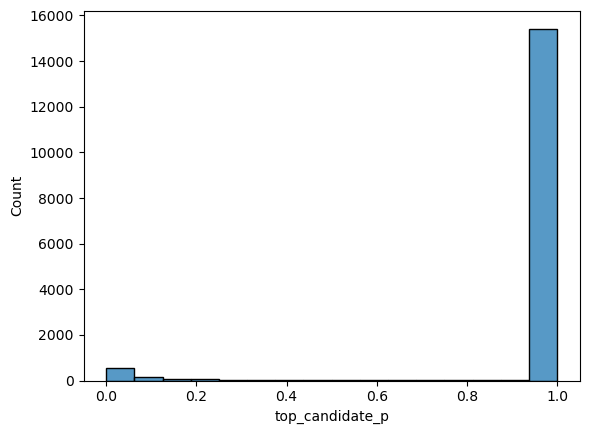

In [31]:
sns.histplot(wza_df['top_candidate_p'])

<Axes: xlabel='scale', ylabel='Z_pVal'>

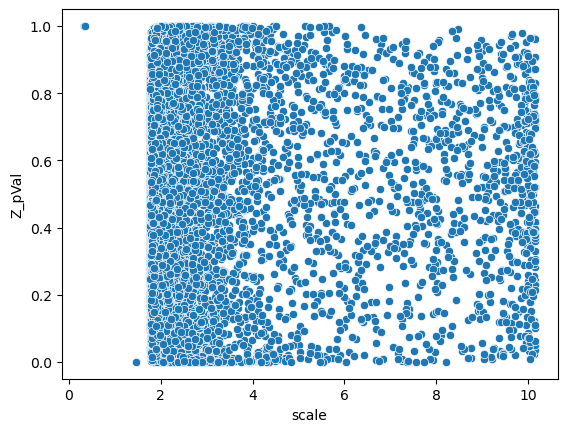

In [27]:
sns.scatterplot(data = wza_df, x = 'scale', y = 'Z_pVal')

In [160]:
wza_df

,Unnamed: 0,gene,SNPs,hits,Z,top_candidate_p,mean,scale,Z_pVal
0,0,1_0,198,0,-6.628373,1.0,0.021489,4.802780,0.916910
1,1,1_1,3,0,2.004490,1.0,-0.057012,1.793973,0.125252
2,2,1_10,22,0,-0.083653,1.0,-0.046870,2.122834,0.506912
3,3,1_100,53,0,-0.937833,1.0,-0.031479,2.642851,0.634180
4,4,1_1000,9,0,0.012213,1.0,-0.053751,1.898656,0.486143
...,...,...,...,...,...,...,...,...,...
16651,16651,5_995,39,0,-0.621054,1.0,-0.038252,2.410545,0.595522
16652,16652,5_996,3,0,1.622175,1.0,-0.057012,1.793973,0.174633
16653,16653,5_997,27,0,4.765707,1.0,-0.044291,2.208095,0.014690
16654,16654,5_998,7,0,-1.304242,1.0,-0.054832,1.863847,0.748679


In [73]:
len(wza_df[wza_df['scale']<0])

22

In [631]:
#wza_df[wza_df['sd']<0].sort_values('sd')

In [632]:
#pd.Series(sdev)[pd.Series(sdev) < 0]

In [633]:
rolled_mean_SNP_number

9622        1.00
13779       1.00
3171        1.00
13781       1.00
7924        1.00
          ...   
4572     1561.46
10063    1565.08
6831     1568.62
6795     1572.00
1246     1575.14
Name: SNPs, Length: 16617, dtype: float64

In [108]:
loc = mean_predictions[i]
loc

-0.0479122787548165

In [122]:
i

16655

In [123]:
wza_df["SNPs"][i]

20

In [161]:
scale = sd_predictions[i]
scale

2.08857969097792

In [174]:
scale = 1

In [175]:
z = wza_df["Z"][i]
z

1.2193371615648432

In [176]:
p = 1 - norm.cdf(z, loc = loc, scale =scale)

In [177]:
p

0.10253305632753396

In [89]:
gotneg = []
for i in range(wza_df.shape[0]):
    loc = mean_predictions[i]
    scale = sd_predictions[i]
    p = 1 - norm.cdf(wza_df["Z"][i], loc = loc, scale =scale)
    if np.isnan(p):
        print(loc, scale, wza_df["Z"][i], rolled_mean_SNP_number[i])

In [541]:
gotneg

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [592]:
wza_results_lfmm_bio1_minentry20 = pd.read_csv('wza_results_lfmm_bio1_minentry0roll2_fix_log.csv')

In [594]:
wza_results_lfmm_bio1_minentry20[wza_results_lfmm_bio1_minentry20['Z_pVal'].isna()]

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal
1234,1_2123,2026,1,-16.758031,1.000000e+00,NaN
1246,1_2134,2440,8,-1.086919,9.999667e-01,NaN
4572,1_5160,2134,2,0.834119,1.000000e+00,NaN
5406,2_1264,1885,2,-6.075635,9.999999e-01,NaN
5592,2_1434,2005,4,1.449589,9.999971e-01,NaN
5662,2_1498,1870,5,-1.764431,9.999545e-01,NaN
6795,2_576,2845,10,9.589931,9.999801e-01,NaN
7217,2_973,1843,3,-3.298034,9.999983e-01,NaN
10063,3_518,1928,3,-3.605227,9.999992e-01,NaN
10099,3_551,1849,77,10.936490,1.184577e-24,NaN


In [278]:
nan_blocks_0_min = wza_results_lfmm_bio1_minentry20[wza_results_lfmm_bio1_minentry20['Z_pVal'].isna()]['gene'].values

In [81]:
wza_lfmm_test = pd.read_csv('wza_results_lfmm_bio1_test.csv')

In [240]:
wza_lfmm = pd.read_csv('wza_results_lfmm_bio1.csv')

In [241]:
wza_lfmm

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal
0,1_0,198,0,-6.628373,1.0,0.920755
1,1_1,3,0,2.004490,1.0,0.127373
2,1_10,22,0,-0.083653,1.0,0.506894
3,1_100,53,0,-0.937833,1.0,0.634716
4,1_1000,9,0,0.012213,1.0,0.486522
...,...,...,...,...,...,...
16651,5_995,39,0,-0.621054,1.0,0.595654
16652,5_996,3,0,1.622175,1.0,0.176845
16653,5_997,27,0,4.765707,1.0,0.014550
16654,5_998,7,0,-1.304242,1.0,0.747704


In [268]:
wza_lfmm

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal
0,1_0,198,0,-6.628373,1.0,0.920755
1,1_1,3,0,2.004490,1.0,0.127373
2,1_10,22,0,-0.083653,1.0,0.506894
3,1_100,53,0,-0.937833,1.0,0.634716
4,1_1000,9,0,0.012213,1.0,0.486522
...,...,...,...,...,...,...
16651,5_995,39,0,-0.621054,1.0,0.595654
16652,5_996,3,0,1.622175,1.0,0.176845
16653,5_997,27,0,4.765707,1.0,0.014550
16654,5_998,7,0,-1.304242,1.0,0.747704


In [244]:
wza_lfmm[wza_lfmm['Z_pVal'].isna()]['gene'].values

array(['1_2123', '1_2134', '1_5160', '2_1264', '2_1434', '2_1498',
       '2_576', '2_973', '3_518', '3_551', '4_234', '5_274', '5_3006',
       '5_331', '5_542', '5_602', '5_724', '5_775', '5_891', '5_918',
       '5_923'], dtype=object)

In [89]:
problematic_windows = pd.read_csv('problematic_windows.csv')

In [112]:
problematic_windows.sort_values('Z')

,Unnamed: 0,gene,SNPs,hits,Z,top_candidate_p
3711,4573,1_5161,39,0,-14.841238,1.000000e+00
5884,7349,3_1091,26,0,-10.558989,1.000000e+00
3069,3752,1_4416,39,0,-9.902736,1.000000e+00
7715,9568,3_3128,38,0,-8.362804,1.000000e+00
2589,3180,1_3895,35,0,-8.340910,1.000000e+00
...,...,...,...,...,...,...
4377,5407,2_1265,16,15,11.151806,1.585000e-29
7169,8884,3_250,38,9,11.374437,1.254594e-10
533,654,1_1594,30,15,12.340603,1.346841e-22
3452,4227,1_485,36,3,12.925697,5.580758e-03


In [101]:
problematic_windows['gene'].unique()

array(['1_1', '1_10', '1_1000', ..., '5_997', '5_998', '5_999'],
      dtype=object)

In [103]:
snps_prob = lfmm[lfmm['block'].isin(problematic_windows['gene'].unique())]

In [106]:
snps_prob.groupby('block').size().sort_values()

block
5_2940     1
5_2765     1
1_3538     1
3_1174     1
4_29       1
          ..
5_2273    54
4_688     55
4_2503    56
5_722     57
1_4364    93
Length: 13339, dtype: int64

In [99]:
lfmm.groupby('block').size().sort_values()[lfmm.groupby('block').size().sort_values() <= 40]

block
2_878      1
2_207      1
5_1149     1
2_2089     1
5_1143     1
          ..
4_2285    40
5_2212    40
2_1721    40
2_1079    40
5_2680    40
Length: 13364, dtype: int64

In [83]:
wza_lfmm_test

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal
0,1_0,198,0,-6.628373,1.0,0.920755
1,1_1,3,0,2.004490,1.0,0.127373
2,1_10,22,0,-0.083653,1.0,0.506894
3,1_100,53,0,-0.937833,1.0,0.634716
4,1_1000,9,0,0.012213,1.0,0.486522
...,...,...,...,...,...,...
16651,5_995,39,0,-0.621054,1.0,0.595654
16652,5_996,3,0,1.622175,1.0,0.176845
16653,5_997,27,0,4.765707,1.0,0.014550
16654,5_998,7,0,-1.304242,1.0,0.747704


In [72]:
(wza_lfmm == wza_lfmm_test).all()

gene                True
SNPs                True
hits                True
Z                   True
top_candidate_p    False
Z_pVal             False
dtype: bool

In [73]:
wza_lfmm

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal
0,1_0,198,0,-6.628373,1.0,0.920755
1,1_1,3,0,2.004490,1.0,0.127373
2,1_10,22,0,-0.083653,1.0,0.506894
3,1_100,53,0,-0.937833,1.0,0.634716
4,1_1000,9,0,0.012213,1.0,0.486522
...,...,...,...,...,...,...
16651,5_995,39,0,-0.621054,1.0,0.595654
16652,5_996,3,0,1.622175,1.0,0.176845
16653,5_997,27,0,4.765707,1.0,0.014550
16654,5_998,7,0,-1.304242,1.0,0.747704


In [75]:
wza_lfmm_test[wza_lfmm_test['Z_pVal'].isna()]

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal
1234,1_2123,2026,1,-19.605747,1.000000e+00,NaN
1246,1_2134,2440,8,-1.345135,9.999667e-01,NaN
4572,1_5160,2134,2,0.718231,1.000000e+00,NaN
5406,2_1264,1885,2,-6.916518,9.999999e-01,NaN
5592,2_1434,2005,4,1.386334,9.999971e-01,NaN
5662,2_1498,1870,5,-1.824462,9.999545e-01,NaN
6795,2_576,2845,10,12.941438,9.999801e-01,NaN
7217,2_973,1843,3,-3.679747,9.999983e-01,NaN
10063,3_518,1928,3,-3.890255,9.999992e-01,NaN
10099,3_551,1849,77,11.789533,1.184577e-24,NaN


In [270]:
wza_lfmm = pd.read_csv('wza_results_lfmm_bio1_nocorrsnps.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'wza_results_lfmm_bio1_nocorrsnps.csv'

In [397]:
wza_lfmm[wza_lfmm['Z_pVal'].isna()]

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal


In [398]:
## results
biovar = 'bio1'

In [667]:
wza_lfmm = pd.read_csv('wza_results_lfmm_bio1_minentry0roll2_fix_log.csv').reset_index()

In [668]:
wza_lfmm[wza_lfmm['Z_pVal'].isna()]

,index,gene,SNPs,hits,Z,top_candidate_p,Z_pVal


In [637]:
'2_970'

'2_970'

In [638]:
'1_702'

'1_702'

In [639]:
threshold_value = 0.05 / len(wza_lfmm)

In [640]:
#wza_lfmm[wza_lfmm['Z_pVal']< threshold_value].to_csv('wza_lfmm_significant_blocks.csv',index=None)

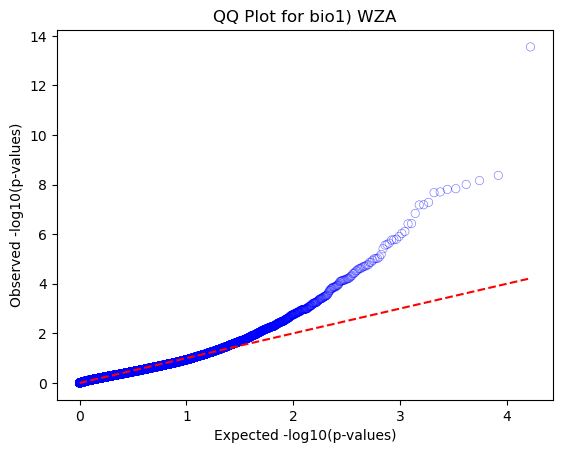

In [641]:
observed_quantiles = -np.log10(np.sort(wza_lfmm['Z_pVal'].values))

# Expected quantiles from the uniform distribution
expected_quantiles = -np.log10(np.linspace(1 / len(wza_lfmm), 1, len(wza_lfmm)))

# QQ plot
sns.scatterplot(x = expected_quantiles, y = observed_quantiles, edgecolor='b', facecolor='none', alpha=0.5)
plt.plot([min(expected_quantiles), max(expected_quantiles)], [min(expected_quantiles), max(expected_quantiles)], 'r--')

plt.xlabel("Expected -log10(p-values)")
plt.ylabel("Observed -log10(p-values)")
plt.title(f'QQ Plot for {biovar}) WZA')

plt.show()

In [642]:
nan_blocks_0_min

array(['1_2123', '1_2134', '1_5160', '2_1264', '2_1434', '2_1498',
       '2_576', '2_973', '3_518', '3_551', '4_234', '5_274', '5_3006',
       '5_331', '5_542', '5_602', '5_724', '5_775', '5_891', '5_918',
       '5_923'], dtype=object)

In [669]:
old = pd.read_csv('wza_results_lfmm_bio1.csv')

In [670]:
old = old[old['Z_pVal'] < threshold_value]

In [671]:
new = wza_lfmm[wza_lfmm['Z_pVal'] < threshold_value]

In [672]:
old

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal
350,1_1318,44,22,13.132881,1.703152e-32,5.361920e-08
654,1_1594,30,15,12.340603,1.346841e-22,1.942342e-08
2046,1_2867,64,12,12.798694,2.029109e-12,2.191944e-06
3850,1_4505,96,9,17.562307,5.923819e-07,4.216780e-08
4126,1_4758,40,2,11.020971,6.073662e-02,2.316135e-06
4227,1_485,36,3,12.925697,5.580758e-03,1.722963e-08
4789,1_702,1699,267,12.236921,1.282245e-221,8.324132e-10
5244,2_1116,26,22,10.800096,1.438617e-40,3.594995e-07
5407,2_1265,16,15,11.151806,1.585000e-29,1.569795e-08
7059,2_827,141,82,22.186910,1.602818e-124,8.449797e-09


In [673]:
old.merge(new, on ='gene', how='outer')

,gene,SNPs_x,hits_x,Z_x,top_candidate_p_x,Z_pVal_x,index,SNPs_y,hits_y,Z_y,top_candidate_p_y,Z_pVal_y
0,1_1318,44.0,22.0,13.132881,1.703152e-32,5.361920e-08,350,44,22,13.132881,1.703152e-32,6.453454e-08
1,1_1594,30.0,15.0,12.340603,1.346841e-22,1.942342e-08,654,30,15,12.340603,1.346841e-22,2.105090e-08
2,1_2867,64.0,12.0,12.798694,2.029109e-12,2.191944e-06,2046,64,12,12.798694,2.029109e-12,2.760377e-06
3,1_4505,96.0,9.0,17.562307,5.923819e-07,4.216780e-08,3850,96,9,17.562307,5.923819e-07,6.551286e-08
4,1_4758,40.0,2.0,11.020971,6.073662e-02,2.316135e-06,4126,40,2,11.020971,6.073662e-02,2.606554e-06
5,1_485,36.0,3.0,12.925697,5.580758e-03,1.722963e-08,4227,36,3,12.925697,5.580758e-03,1.972271e-08
6,1_702,1699.0,267.0,12.236921,1.282245e-221,8.324132e-10,4789,1620,267,11.934348,1.282245e-221,1.473916e-09
7,2_1116,26.0,22.0,10.800096,1.438617e-40,3.594995e-07,5244,26,22,10.800096,1.438617e-40,3.719153e-07
8,2_1265,16.0,15.0,11.151806,1.585000e-29,1.569795e-08,5407,16,15,11.151806,1.585000e-29,1.461710e-08
9,2_827,141.0,82.0,22.186910,1.602818e-124,8.449797e-09,7059,141,82,22.186910,1.602818e-124,1.550845e-08


In [674]:
new

,index,gene,SNPs,hits,Z,top_candidate_p,Z_pVal
350,350,1_1318,44,22,13.132881,1.703152e-32,6.453454e-08
654,654,1_1594,30,15,12.340603,1.346841e-22,2.105090e-08
2046,2046,1_2867,64,12,12.798694,2.029109e-12,2.760377e-06
3850,3850,1_4505,96,9,17.562307,5.923819e-07,6.551286e-08
4126,4126,1_4758,40,2,11.020971,6.073662e-02,2.606554e-06
4227,4227,1_485,36,3,12.925697,5.580758e-03,1.972271e-08
4789,4789,1_702,1620,267,11.934348,1.282245e-221,1.473916e-09
5244,5244,2_1116,26,22,10.800096,1.438617e-40,3.719153e-07
5407,5407,2_1265,16,15,11.151806,1.585000e-29,1.461710e-08
6795,6795,2_576,1620,10,9.872599,9.999801e-01,2.908219e-07


In [675]:
5_2922

52922

In [676]:
import pickle
dict_blocks = '../key_files/blocks_snpsid_dict.pkl'

with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

In [677]:
dict_blocks['5_2922'][-1] #5:24100585-24286474

'5_24286474'

In [678]:
blocks_di

NameError: name 'blocks_di' is not defined

In [644]:
set(wza_lfmm.loc[wza_lfmm['Z_pVal'] == 0]['gene']).intersection(set(nan_blocks_0_min))

set()

In [645]:
wza_lfmm.loc[wza_lfmm['Z_pVal'] == 0]

,index,gene,SNPs,hits,Z,top_candidate_p,Z_pVal


In [679]:
wza_lfmm['chrom'] = wza_lfmm['gene'].str.split('_').str[0].astype(int)
wza_lfmm['pos'] = wza_lfmm['gene'].str.split('_').str[1].astype(int)

/tmp/ipykernel_4114247/2864721639.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


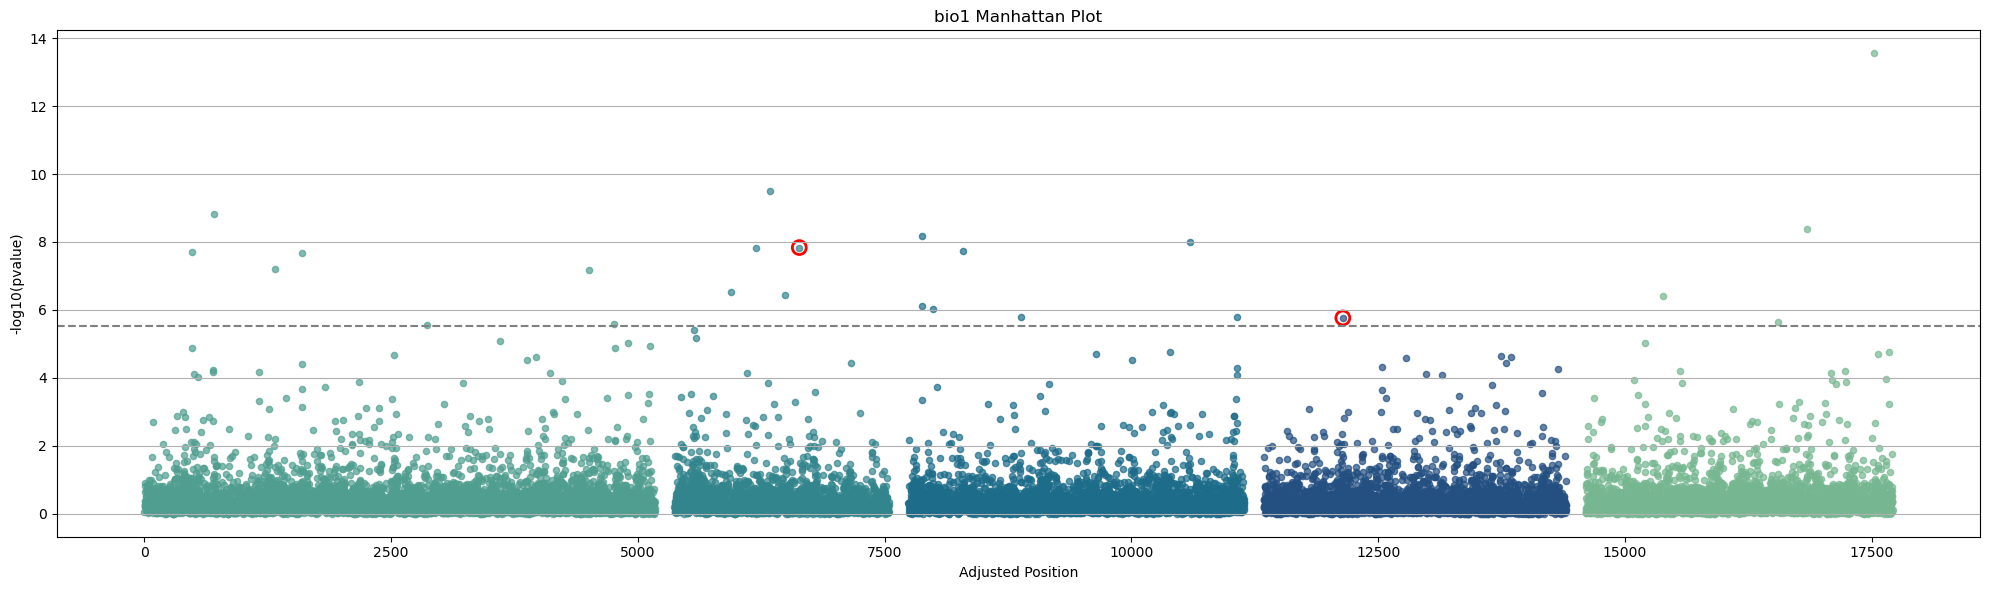

In [680]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Significance threshold
threshold_value = 0.05 / len(wza_lfmm)
threshold = -np.log10(threshold_value)
biovar = 'bio1'

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

# Define colors for each chromosome
colors = sns.color_palette("crest", n_colors=5)

# Calculate chromosome offsets to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Add buffer to prevent overlap

# Apply offsets to the position
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 6))

# Plot each chromosome separately
for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7, 
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
        s=20
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')
plt.grid(axis='y')

# Add a threshold line for significance
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Identify significant blocks in wza_lfmm
significant_blocks = df[df['-log10(pvalue)'] >= threshold]


# Highlight specific genes if needed
genes = ['2_1265', '4_801']  # List of specific genes to highlight
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',
            linewidth=2,
            facecolor='none',
            s=100,
            label=f'Gene {gene}'
        )

plt.tight_layout()
plt.show()


/tmp/ipykernel_3972733/450657511.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


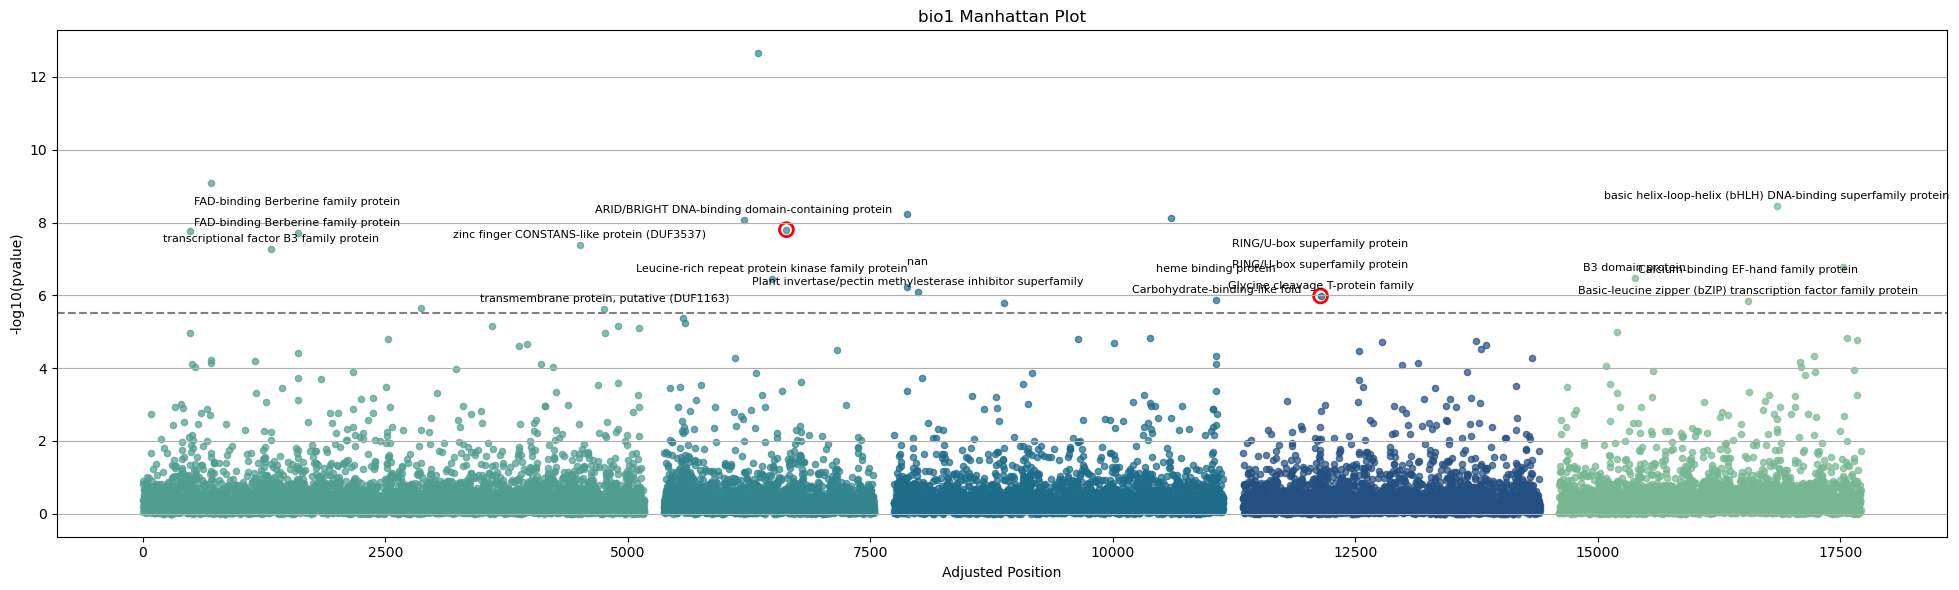

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Significance threshold
threshold_value = 0.05 / len(wza_lfmm)
threshold = -np.log10(threshold_value)
biovar = 'bio1'

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

# Define colors for each chromosome
colors = sns.color_palette("crest", n_colors=5)

# Calculate chromosome offsets to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Add buffer to prevent overlap

# Apply offsets to the position
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 6))

# Plot each chromosome separately
for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7, 
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
        s=20
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')
plt.grid(axis='y')

# Add a threshold line for significance
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Identify significant blocks in wza_lfmm
significant_blocks = df[df['-log10(pvalue)'] >= threshold]

# Merge significant blocks with the annotation dataframe based on chrom_pos and block
annotated_blocks = significant_blocks.merge(small, left_on='chrom_pos', right_on='block', how='inner')

# Annotate the significant points with 'description1' and space annotations vertically
for chrom_pos, group in annotated_blocks.groupby('chrom_pos'):
    # Sort the group to ensure consistent spacing
    group = group.sort_values(by='description1')
    vertical_offset = 0  # Start the vertical offset at 0
    for i, row in group.iterrows():
        plt.annotate(
            row['description1'], 
            (row['adjusted_position'], row['-log10(pvalue)']),
            textcoords="offset points",  # Specify the offset point for the text
            xytext=(0, 5 + vertical_offset),  # Increment vertical offset for each annotation
            ha='center',    # Align horizontally to center
            fontsize=8,
            color='black'
        )
        vertical_offset += 15  # Increase vertical offset for the next annotation

# Highlight specific genes if needed
genes = ['2_1265', '4_801']  # List of specific genes to highlight
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',
            linewidth=2,
            facecolor='none',
            s=100,
            label=f'Gene {gene}'
        )

plt.tight_layout()
plt.show()


/tmp/ipykernel_3972733/1450895180.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


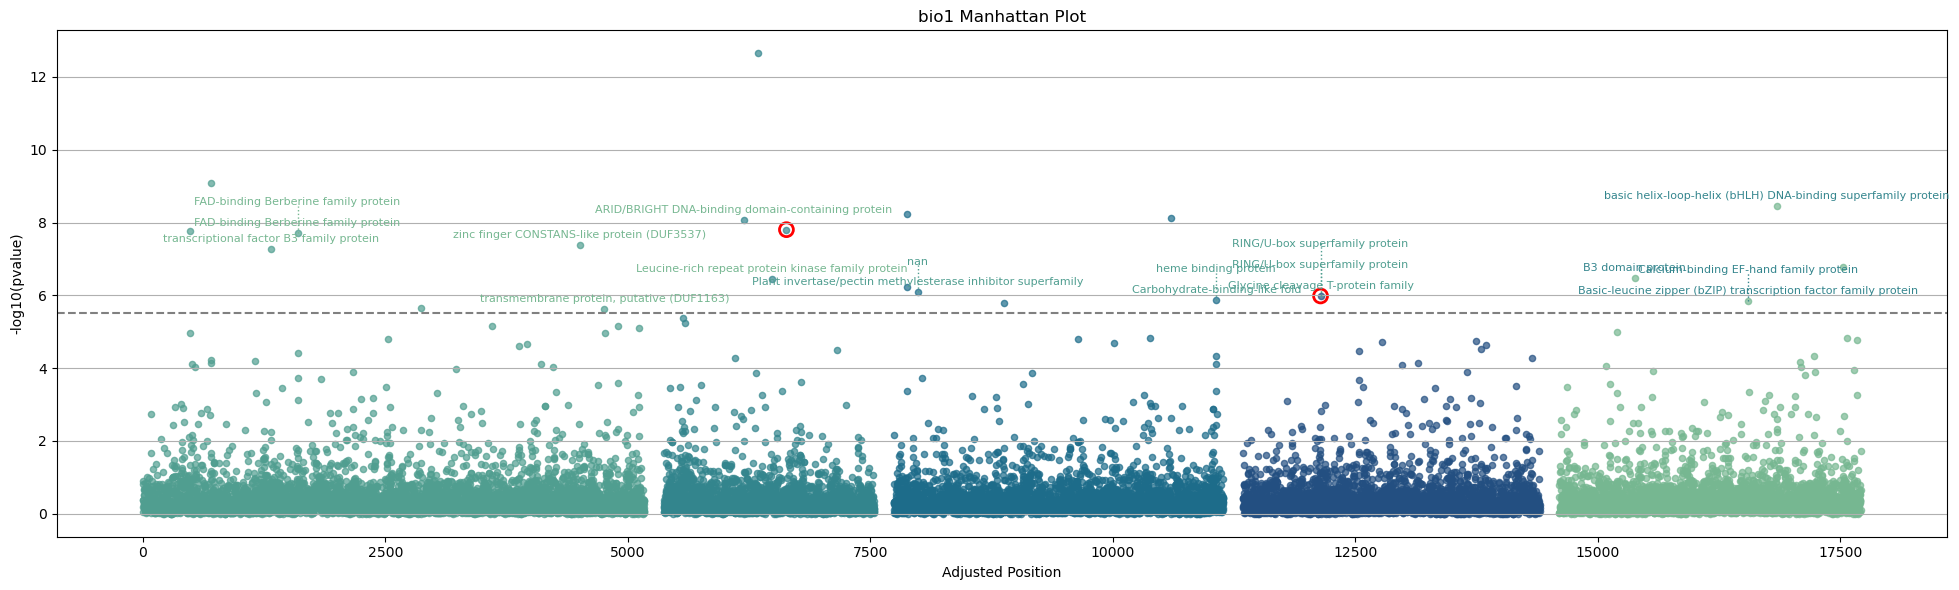

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Significance threshold
threshold_value = 0.05 / len(wza_lfmm)
threshold = -np.log10(threshold_value)
biovar = 'bio1'

# Create chrom_pos in wza_lfmm by combining 'chrom' and 'pos'
wza_lfmm['chrom_pos'] = wza_lfmm['chrom'].astype(str) + '_' + wza_lfmm['pos'].astype(str)

# Copy the relevant columns for plotting
df = wza_lfmm[['Z_pVal', 'pos', 'chrom', 'chrom_pos']].copy()

# Parse chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

# Define colors for each chromosome or block
colors = sns.color_palette("crest", n_colors=len(df['chromosome'].unique()))  # Assign a unique color per chromosome

# Calculate chromosome offsets to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Add buffer to prevent overlap

# Apply offsets to the position
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Create the Manhattan plot
plt.figure(figsize=(20, 6))

# Plot each chromosome separately
for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7, 
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
        s=20
    )

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')
plt.grid(axis='y')

# Add a threshold line for significance
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Identify significant blocks in wza_lfmm
significant_blocks = df[df['-log10(pvalue)'] >= threshold]

# Merge significant blocks with the annotation dataframe based on chrom_pos and block
annotated_blocks = significant_blocks.merge(small, left_on='chrom_pos', right_on='block', how='inner')

# Annotate the significant points with 'description1', space annotations, and color-code them
for chrom_pos, group in annotated_blocks.groupby('chrom_pos'):
    group = group.sort_values(by='description1')
    vertical_offset = 0  # Start the vertical offset at 0
    
    # Color for this block
    color = colors[chromosome_offsets[group['chromosome'].iloc[0]] % len(colors)]

    for i, row in group.iterrows():
        # Add the annotation
        plt.annotate(
            row['description1'], 
            (row['adjusted_position'], row['-log10(pvalue)']),
            textcoords="offset points",  
            xytext=(0, 5 + vertical_offset),  # Offset vertically for each annotation
            ha='center',
            fontsize=8,
            color=color  # Use the same color for annotation
        )
        
        # Draw a line connecting the point to the annotation
        plt.plot(
            [row['adjusted_position'], row['adjusted_position']],  # X coordinates (same X)
            [row['-log10(pvalue)'], row['-log10(pvalue)'] + (vertical_offset / 20)],  # Y coordinates
            color=color, linewidth=1, linestyle='dotted'
        )
        
        vertical_offset += 15  # Increase vertical offset for the next annotation

# Highlight specific genes if needed
genes = ['2_1265', '4_801']  # List of specific genes to highlight
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',
            linewidth=2,
            facecolor='none',
            s=100,
            label=f'Gene {gene}'
        )

plt.tight_layout()
plt.show()


/tmp/ipykernel_3972733/3243139160.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


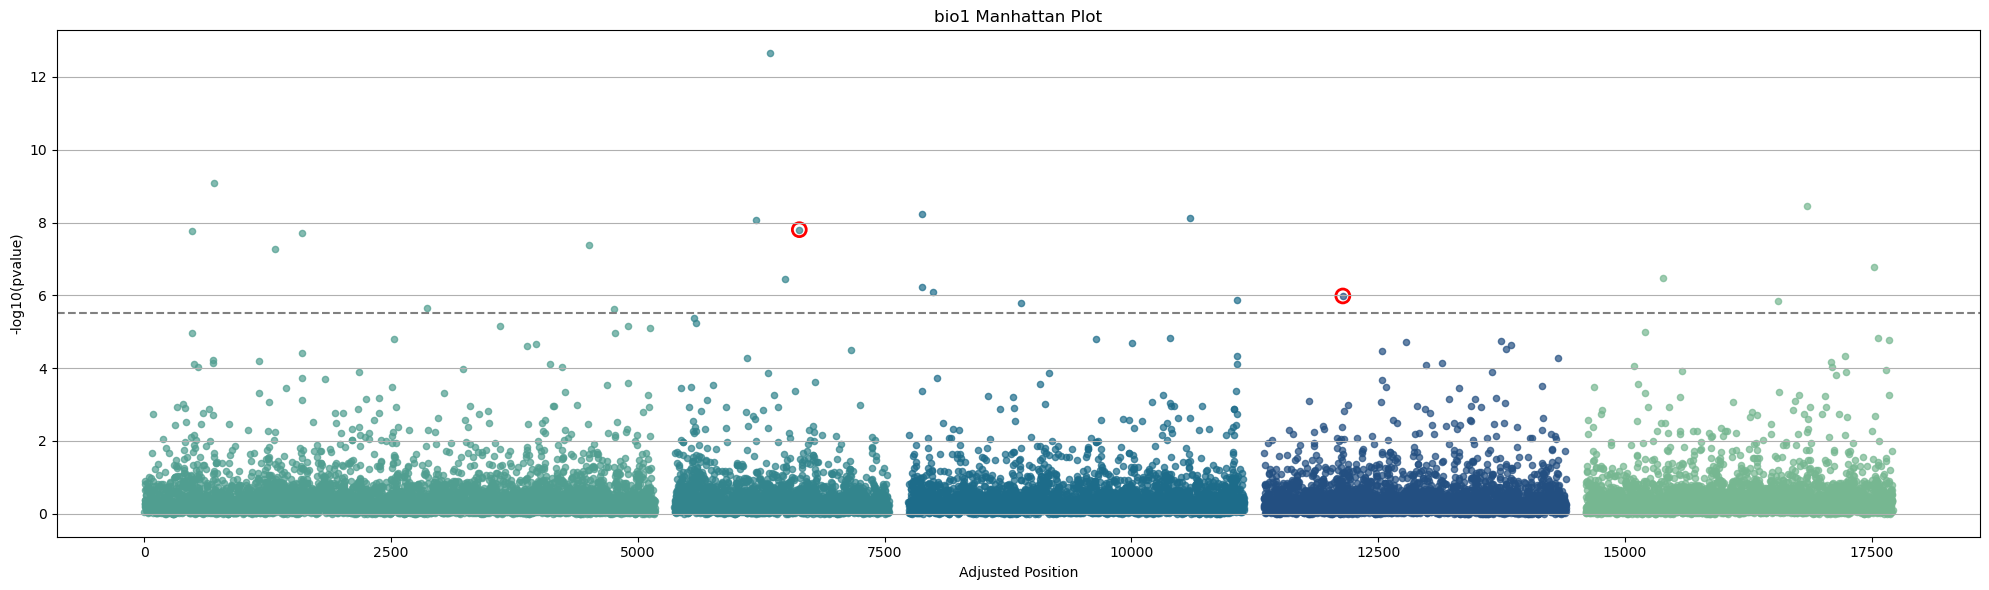

In [27]:
threshold_value = 0.05 / len(wza_lfmm)
biovar='bio1'
#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = wza_lfmm[['Z_pVal','pos','chrom']].copy()


# Parsing chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

colors = sns.color_palette("crest", n_colors = 5)

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Buffer to prevent overlap

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Normalize sizes for better visualization
size_transform = 2  # Adjust this factor as needed


# Create a color map based on `n_est`
#df['color'] = df['n_est'].map(lambda x: cmap(norm(x)))

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7,  # Transparency for better visibility
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
            s= 20)

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')  # Set the title
plt.grid(axis='y')


#genes = ['2_199', '3_2730', '5_2244']
genes = ['2_1265', '4_801']
# Add circles around the specific genes
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',  # Color of the edge of the circle
            linewidth=2,      # Width of the edge line
            facecolor='none', # Facecolor of the circle (None means transparent)
            s=100,            # Size of the circle
            label=f'Gene {gene}'
        )
# Create a legend for the number of estimated lineages
#handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(n)), markersize=10, label=f'Lineages {n}') for n in sorted(n_est_unique)]
#plt.legend(handles=handles, title="Estimated Lineages", bbox_to_anchor=(1.05, 1), loc='upper left')

# Threshold line
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Show the plot
plt.tight_layout()
plt.show()


In [51]:
wza_kendall = pd.read_csv('wza_kendalltau_results_bio1.csv').reset_index()

In [52]:
wza_kendall['chrom'] = wza_kendall['gene'].str.split('_').str[0].astype(int)
wza_kendall['pos'] = wza_kendall['gene'].str.split('_').str[1].astype(int)

In [53]:
threshold_value = 0.05 / len(wza_kendall)

In [54]:
wza_kendall[wza_kendall['Z_pVal']< threshold_value].to_csv('wza_kendall_significant_blocks.csv',index=None)

In [ ]:
wza_kendall

In [ ]:
gene - the name of the window
SNPs - the number of SNPs in this window
hits - the number of SNPs in the 99th percentile (not used for anything, just good to know)
Z - the Z score calculated for the gene
top_candidate_p - the result of the top-candidate method of Yeaman et al (2016 - Science)
LA - an indicator of whether the gene is causal for local adaptation
position - the average position of all SNPs in the window
Z_pVal - the p-value of the Z score (This is the WZA score)


/tmp/ipykernel_894693/1995763944.py:1: RuntimeWarning: divide by zero encountered in log10
  observed_quantiles = -np.log10(np.sort(wza_kendall['Z_pVal'].values))


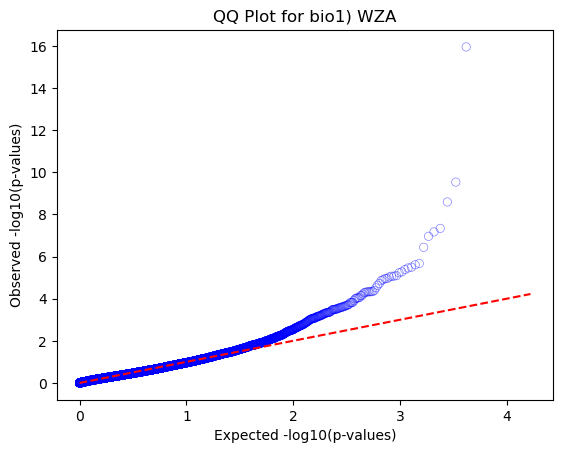

In [48]:
observed_quantiles = -np.log10(np.sort(wza_kendall['Z_pVal'].values))

# Expected quantiles from the uniform distribution
expected_quantiles = -np.log10(np.linspace(1 / len(wza_kendall), 1, len(wza_kendall)))

# QQ plot
sns.scatterplot(x = expected_quantiles, y = observed_quantiles, edgecolor='b', facecolor='none', alpha=0.5)
plt.plot([min(expected_quantiles), max(expected_quantiles)], [min(expected_quantiles), max(expected_quantiles)], 'r--')

plt.xlabel("Expected -log10(p-values)")
plt.ylabel("Observed -log10(p-values)")
plt.title(f'QQ Plot for {biovar}) WZA')

plt.show()

/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_894693/2348446781.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


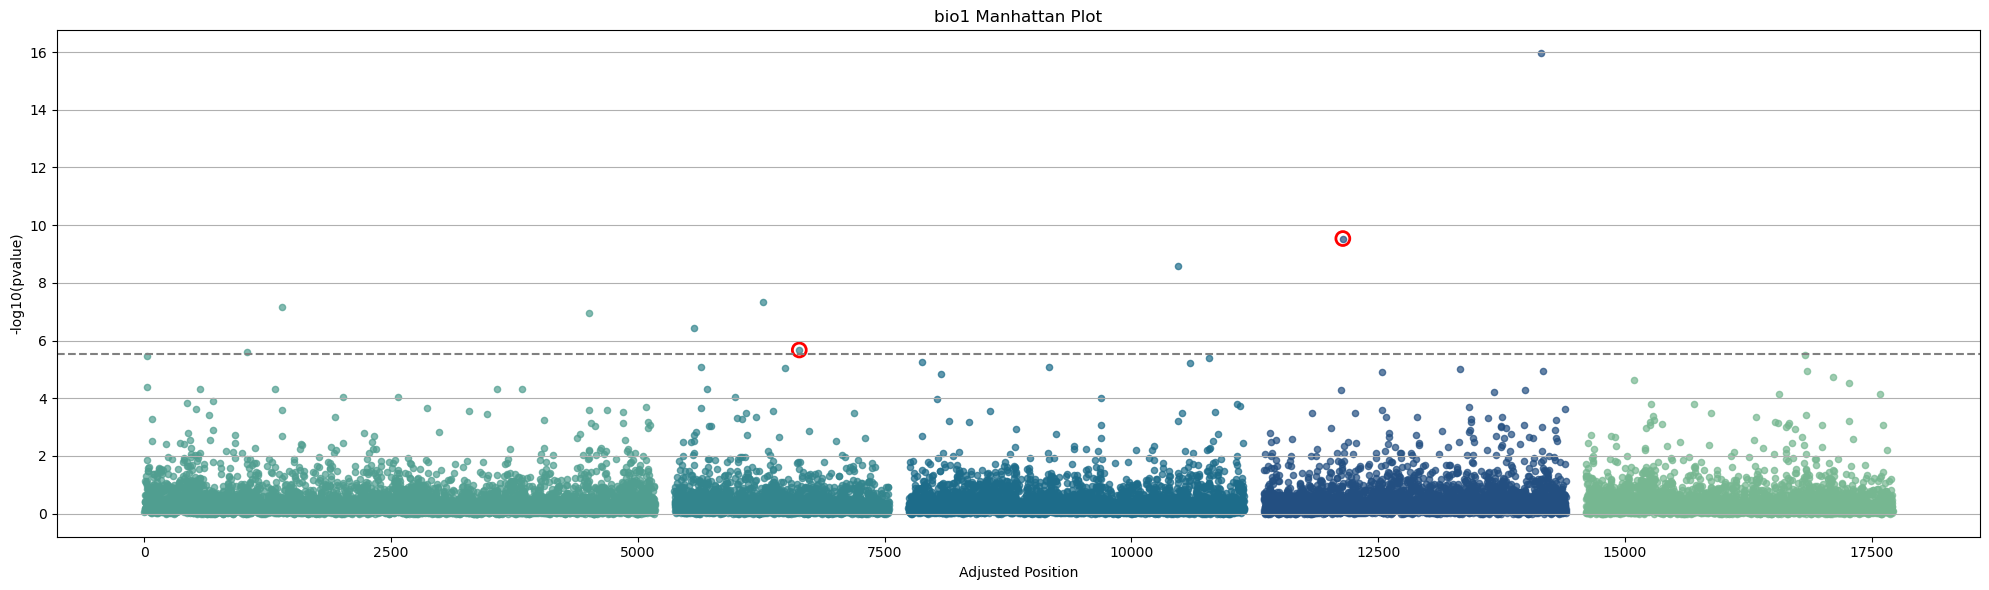

In [57]:
threshold_value = 0.05 / len(wza_kendall)
biovar='bio1'
#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = wza_kendall[['Z_pVal','pos','chrom']].copy()


# Parsing chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['Z_pVal'])

colors = sns.color_palette("crest", n_colors = 5)

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 200  # Buffer to prevent overlap

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Normalize sizes for better visualization
size_transform = 2  # Adjust this factor as needed


# Create a color map based on `n_est`
#df['color'] = df['n_est'].map(lambda x: cmap(norm(x)))

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(
        subset['adjusted_position'],
        subset['-log10(pvalue)'],
        alpha=0.7,  # Transparency for better visibility
        c=colors[chrom % len(colors)], 
        label=f'Chr {chrom}',
            s= 20)

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
plt.title(f'{biovar} Manhattan Plot')  # Set the title
plt.grid(axis='y')

# Create a legend for the number of estimated lineages
#handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(n)), markersize=10, label=f'Lineages {n}') for n in sorted(n_est_unique)]
#plt.legend(handles=handles, title="Estimated Lineages", bbox_to_anchor=(1.05, 1), loc='upper left')
#genes = ['2_199', '3_2730', '5_2244']
genes = ['2_1265', '4_801']
# Add circles around the specific genes
for gene in genes:
    chrom, pos = map(int, gene.split('_'))
    subset_gene = df[(df['chromosome'] == chrom) & (df['position'] == pos)]
    if not subset_gene.empty:
        plt.scatter(
            subset_gene['adjusted_position'],
            subset_gene['-log10(pvalue)'],
            edgecolor='red',  # Color of the edge of the circle
            linewidth=2,      # Width of the edge line
            facecolor='none', # Facecolor of the circle (None means transparent)
            s=100,            # Size of the circle
            label=f'Gene {gene}'
        )


# Threshold line
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_3175312/2368688080.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


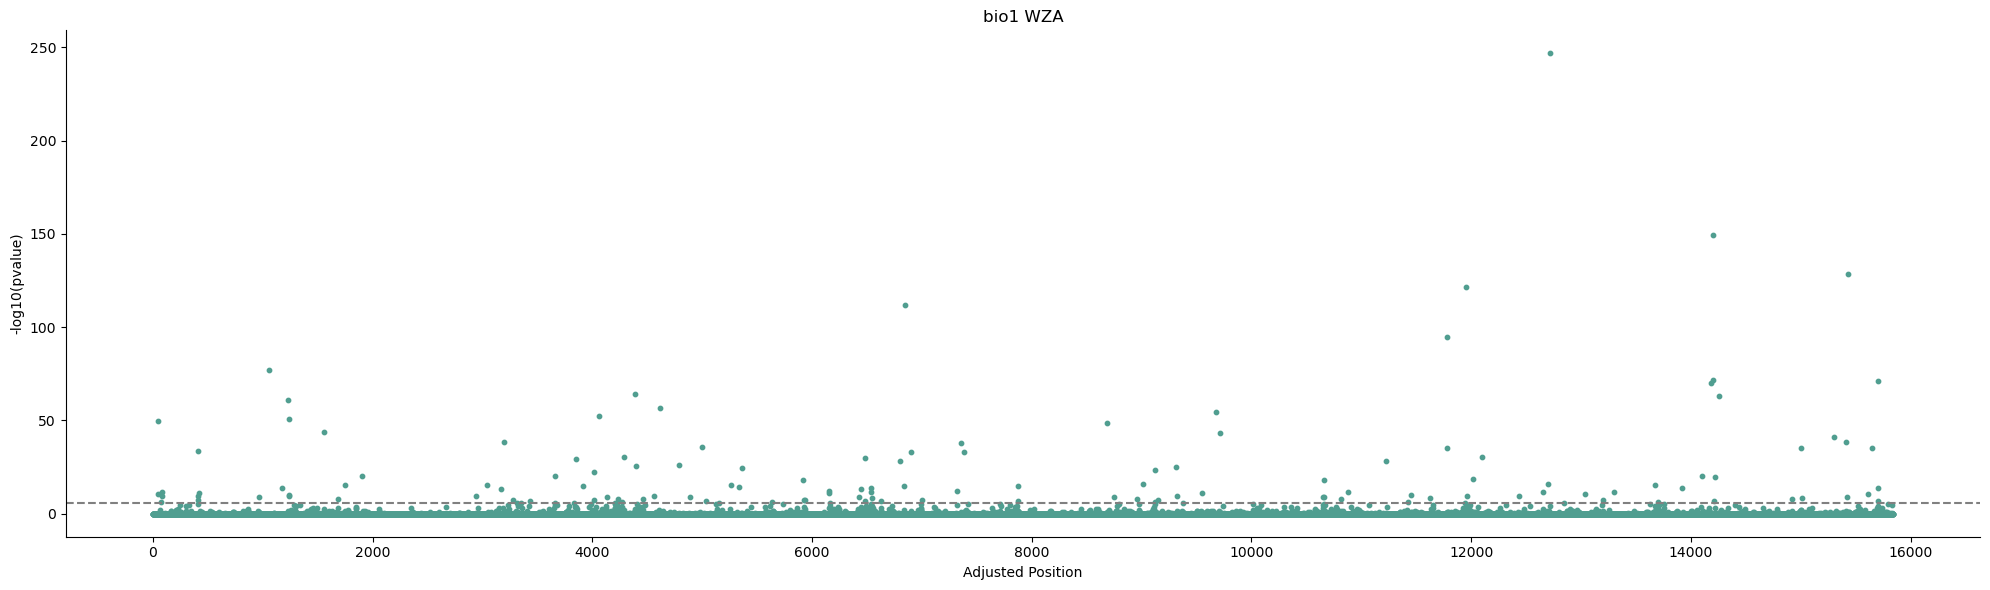

In [50]:
threshold_value = 0.05 / len(wza)
biovar='bio1'
#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = wza[['top_candidate_p', 'index']].copy()

colors = sns.color_palette("crest", n_colors = 5)

# Parsing chromosome number and position
df['chromosome'] = 1
df['position'] = df['index']
df['-log10(pvalue)'] = -np.log10(df['top_candidate_p'])

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
#plt.title('Manhattan Plot')
#plt.grid(axis='y')
#plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)
# Threshold line (optional)
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')
plt.title(f'{biovar} WZA')  # Set the title

# Show the plot
plt.tight_layout()
plt.savefig(f'manhattan_{biovar}.png')
plt.show()